## Situacion Probelma 2
**Rodrigo Lopez Murguia**

**Victor Misael Escalante Alvarado**

In [161]:
import matplotlib.pyplot as plt
import numpy as np

### Declaracion de clases usadas

Declaracion de la clase nodo y arista para represetar las coordenadas y graficarla

In [162]:
class Node :
    def __init__(self, node_id, x, y, is_source):
        self.node_id = node_id
        self.x = x
        self.y = y
        self.is_source = is_source

In [163]:
class Tuberia :
    def __init__(self, start_node, end_node, capacity):
        self.start_node = start_node
        self.end_node = end_node
        self.capacity = float(capacity)

        self.length = 0

### Lectura de Instancias 

#### Funcion para reformatear un archivo de texto
Es la preparacion del archivo a partir de los .txt en donde se genera una lista con los nodos , las aristas y la oficina.

In [164]:
def file_prep(route) :
    '''
    num_nodos num_aristas
    [NODES]
    num_nodo x y isfont
    [EDGES]
    num_nodo1 num_nodo2 capacidad
    [OFFICE]
    num_nodo
    [NEW_NODEs]
    x y diametro
    '''
    with open(route) as file:
        # lista de nodos
        nodes = []
        tuberias = []
        new_nodes = []

        lines = file.readlines()
        
        num_nodos = int(lines[0].split(" ")[0])
        num_aristas = int(lines[0].split(" ")[1])
        # llenamos la lista de nodos
        for i in range(2,2+num_nodos):
            lines[i] = lines[i].split(" ")
            nodes.append(Node(int(lines[i][0]),float(lines[i][1]),float(lines[i][2]),int(lines[i][3])))
        ## llenamos la lista de tuberias
        for i in range(4+num_nodos,4+num_nodos+num_aristas-1):
            lines[i] = lines[i].split(" ")
            tuberias.append(Tuberia(int(lines[i][0]),int(lines[i][1]),float(lines[i][2])))

        # oficina
        office_node = int(lines[4+num_nodos+num_aristas])
        # nuevos nodos

        for i in range(6+num_nodos+num_aristas, len(lines)):
            lines[i] = lines[i].split(" ")
            
            new_node = Node(-1,float(lines[i][0]),float(lines[i][1]),0)
            new_nodes.append(new_node)

    
    return nodes, tuberias , new_nodes, office_node


#### Algoritmo principal
Toma las instancias , las prepara y corre los algoritmos necesarios para reolver la problemática

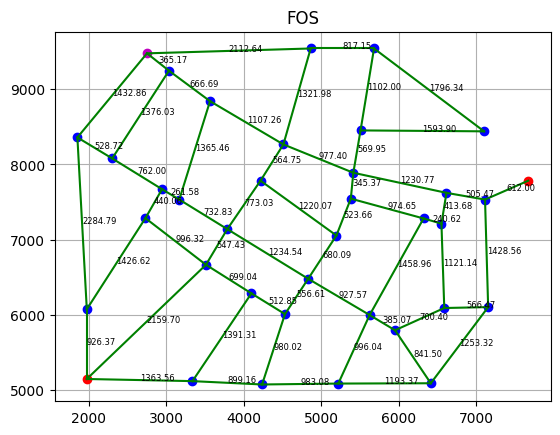

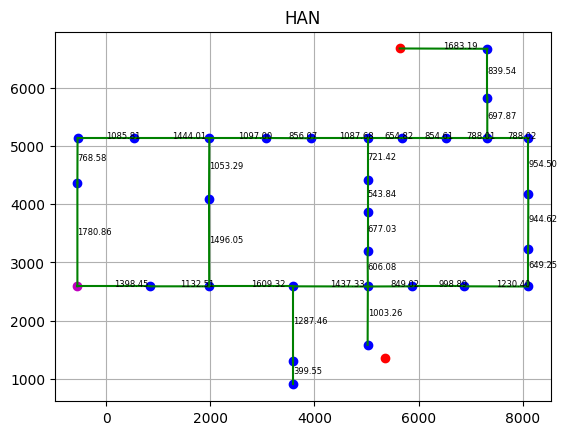

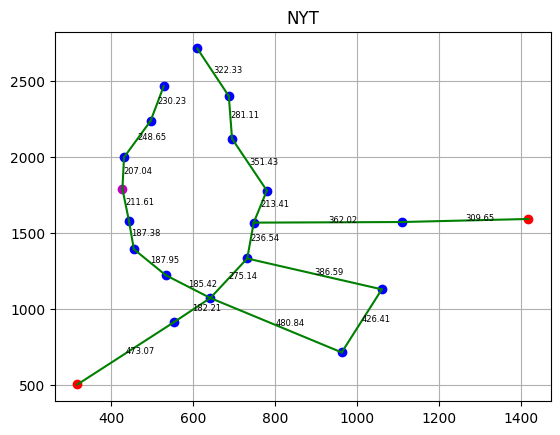

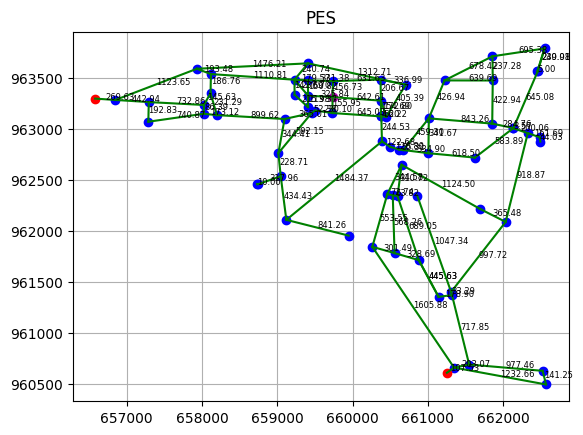

In [165]:
Files_Routes = ["/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/SituacionProblema2/FOS.txt",
                "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/SituacionProblema2/HAN.txt",
                "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/SituacionProblema2/NYT.txt",
                "/Users/misa_v/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/Sem 5/Algoritmos_/SituacionProblema2/PES.txt"]

Files_Titles = ["FOS", "HAN", "NYT", "PES"]

for route in Files_Routes:
    nodos_limpio , tuberias_limpio, new_nodes , id_office = file_prep(route)
    
    # Create a dictionary to map node IDs to Node instances
    node_dict = {node.node_id: node for node in nodos_limpio}

    plt.figure()
    plt.title(Files_Titles[Files_Routes.index(route)])
    for node in nodos_limpio:

        if node.is_source == 1:
            plt.plot(node.x, node.y, 'ro')
        elif node.node_id == id_office:
            plt.plot(node.x, node.y, 'mo')
        else:
            plt.plot(node.x, node.y, 'bo')

    for tuberia in tuberias_limpio:

        tuberia.length = np.sqrt((node_dict[tuberia.start_node].x - node_dict[tuberia.end_node].x)**2 + (node_dict[tuberia.start_node].y - node_dict[tuberia.end_node].y)**2)

        plt.plot([node_dict[tuberia.start_node].x, node_dict[tuberia.end_node].x],[node_dict[tuberia.start_node].y, node_dict[tuberia.end_node].y], 'g')
        
        plt.text((node_dict[tuberia.start_node].x + node_dict[tuberia.end_node].x) / 2,(node_dict[tuberia.start_node].y + node_dict[tuberia.end_node].y) / 2,f'{tuberia.length:.2f}', color='black', fontsize=6)
    plt.grid()
    plt.show()
    
    